# **Comprehensive Analysis and Modelling User Revenue Behaviour of E-Commerce**

---



**Problem Statement**
E-commerce businesses face the challenge of understanding user behaviour and engagement to drive conversions and maximize revenue. Identifying key metrics, such as time spent on product pages and interaction patterns which are essential for predicting revenue generation. By employing predictive modelling to analyse session data, businesses can identify areas for targeted improvement, reduce bounce rates, enhance customer satisfaction, and implement data-driven strategies to increase revenue.


Importing required libraries

In [2]:

# Data manipulation and exploration
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Handling missing values
from sklearn.impute import SimpleImputer
# Handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

# feature manipulation
from sklearn.preprocessing import StandardScaler

# dim reduction
from sklearn.decomposition import PCA

# for model building and evaluation

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy.stats import zscore
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import warnings # Use this System warnings for your code to be annoying-free
warnings.filterwarnings("ignore")


Importing data set

In [3]:
shoppers_data_main = pd.read_csv('online_shoppers_intention.csv')
shoppers_data = shoppers_data_main
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shoppers_data.info() # Display of concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Summary of data set :**

The dataset analysed in this study was sourced from the UC Irvine Machine Learning Repository and comprises 18 features, including 10 quantitative and 8 categorical (6 nominal, 2 Boolean) variables. Key features include Browsing Behaviour and Time Dependent variables (quantitative), User Characteristics (nominal), and the Target Variable ("Revenue"), which is binary in nature.



In [5]:
shoppers_data.describe() # Data Summary Statistics

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
shoppers_data.isnull().sum() # Checking for null values

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [7]:
numerical_vars = shoppers_data.select_dtypes(include=['float64', 'int64']).columns # Select numerical columns

# Analyzing different traffic sources (direct, referral, search, etc.) impact conversion rates.


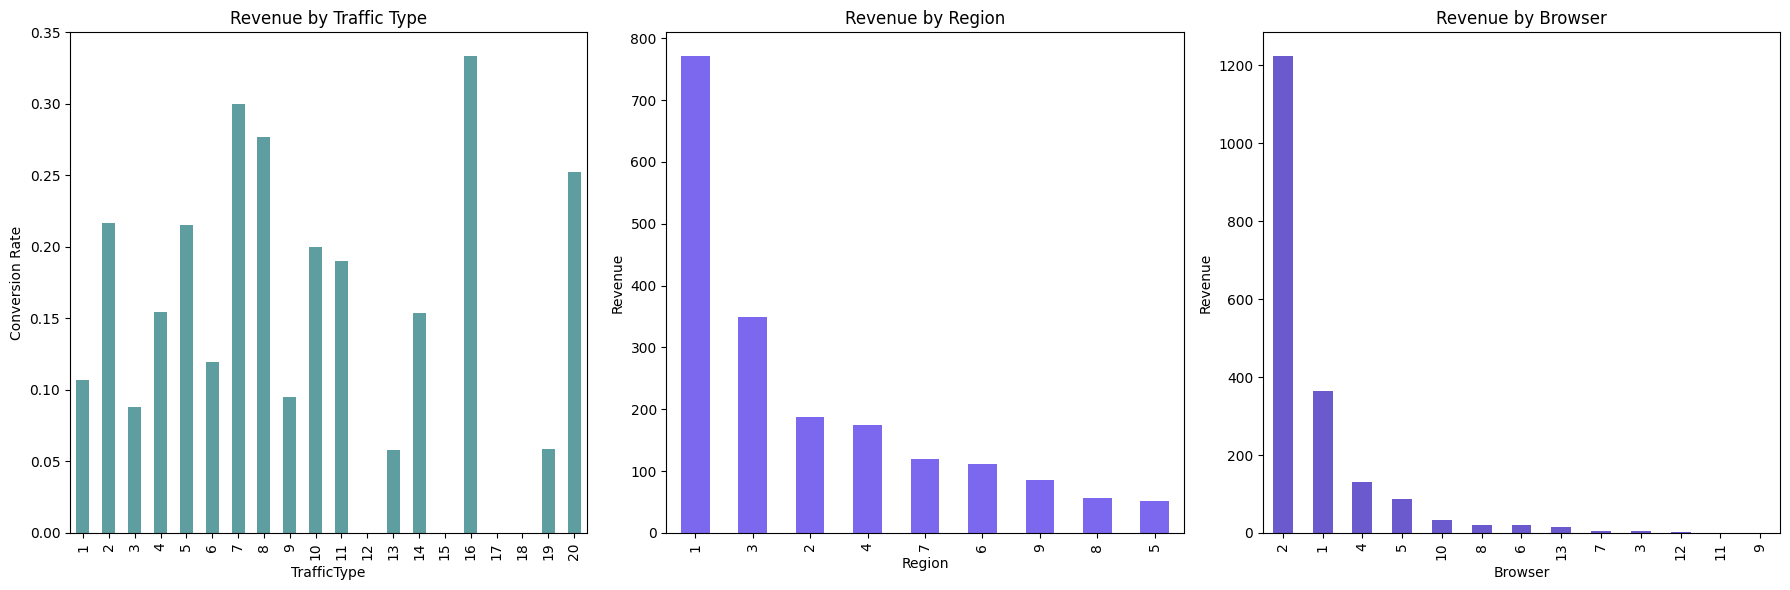

In [8]:
import matplotlib.pyplot as plt

# Create a 1x3 grid for the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Conversion Rate by Traffic Type
traffic_conversion_rate = shoppers_data.groupby('TrafficType')['Revenue'].apply(lambda x: (x > 0).mean())
traffic_conversion_rate.plot(kind='bar', color='cadetblue', ax=axes[0])
axes[0].set_title('Revenue by Traffic Type')
axes[0].set_ylabel('Conversion Rate')

# Plot Revenue by Region
region_revenue = shoppers_data.groupby('Region')['Revenue'].sum()
region_revenue.sort_values(ascending=False).plot(kind='bar', color='mediumslateblue', ax=axes[1])
axes[1].set_title('Revenue by Region')
axes[1].set_ylabel('Revenue')

# Plot Revenue by Browser
browser_revenue = shoppers_data.groupby('Browser')['Revenue'].sum()
browser_revenue.sort_values(ascending=False).plot(kind='bar', color='slateblue', ax=axes[2])
axes[2].set_title('Revenue by Browser')
axes[2].set_ylabel('Revenue')

# Adjust layout
plt.tight_layout()
plt.show()


**Revenue by Traffic Type**: TrafficType_16 and TrafficType_7 drive the highest conversions, while others like TrafficType_15 TrafficType_12 TrafficType_17 TrafficType_18 perform poorly, highlighting key traffic sources for optimization. Remaining traffic types has moderate contributions.

**Revenue by Region:** Region 1 generates the most revenue, followed by Regions 3 and 2, while remaining regions has moderate contributions present opportunities for improvement.

**Revenue by Browser:** Browser 2 leads in revenue generation, followed by Browser 1, with minimal contributions from others, indicating a need to target underperforming browser users.

**What traffic types are more likely to convert into sales which helps guiding marketing budget.**

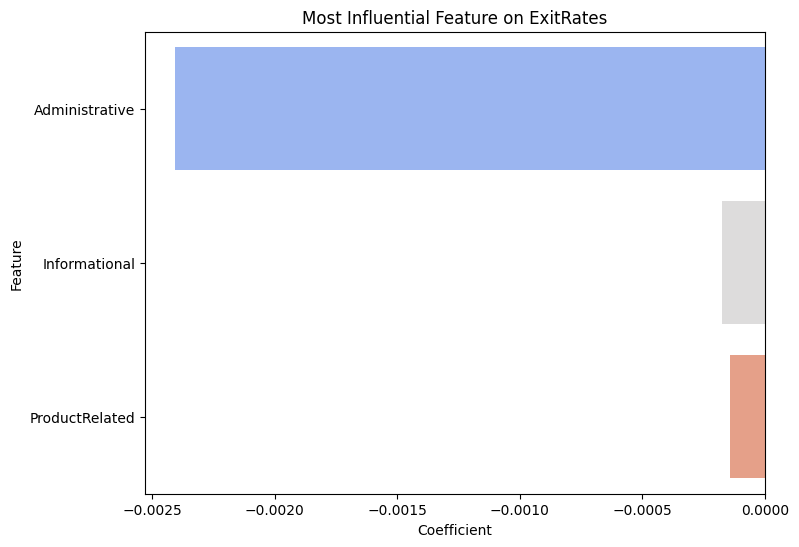

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of interest
columns_of_interest = ['Administrative', 'Informational', 'ProductRelated','BounceRates']
subset_data = shoppers_data[columns_of_interest]

# Define the independent variables (X) and the dependent variable (y)
X = subset_data.drop(columns=['BounceRates'])  # Features
y = subset_data['BounceRates']  # Target variable

# Initialize and fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# The coefficients and feature names
coefficients = reg_model.coef_
features = X.columns

# DataFrame to better visualize the coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()  # Add absolute values for sorting

# Sorting the coefficients by absolute value to find the most influential variable
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the most influential variable
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Most Influential Feature on ExitRates')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()





*   **Administrative** features have the highest negative impact on exit rates,
      indicating their importance in retaining users.


*   **Informational** features show a smaller but noticeable influence on
     exit rates.
     
*   **ProductRelated** features contribute the least to exit rates, implying
     less direct relevance.





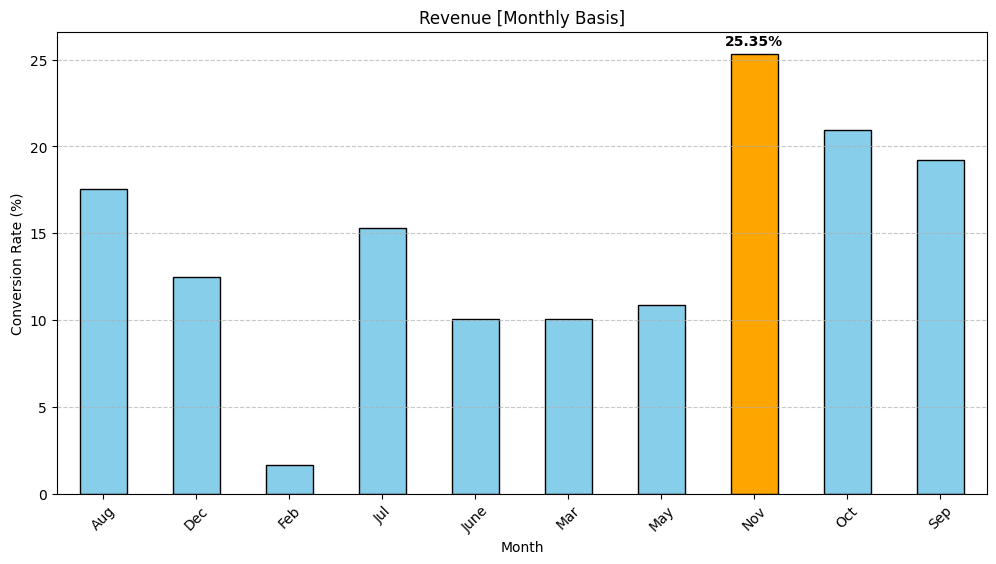

In [13]:
monthly_conversion = shoppers_data.groupby('Month')['Revenue'].mean() * 100 # Monthly Conversion Rates


max_month = monthly_conversion.idxmax() # Identify the month with the highest conversion rate
colors = ['skyblue' if month != max_month else 'orange' for month in monthly_conversion.index]

plt.figure(figsize=(12, 6))
monthly_conversion.sort_index().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Revenue [Monthly Basis]')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(monthly_conversion.index.get_loc(max_month), monthly_conversion.max() + 0.5,
         f'{monthly_conversion[max_month]:.2f}%',
         ha='center', color='black', fontweight='bold')
plt.show()





1. **November** has the highest conversion rate at **25.35%**, significantly surpassing other months.
2. **February** shows the lowest conversion rate, around **1%**.

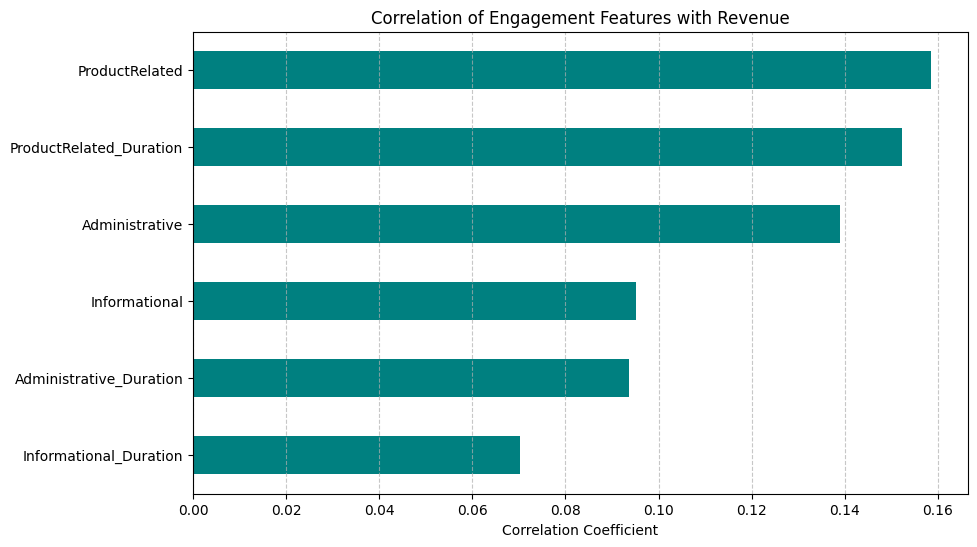

In [24]:
# Select engagement-related features and compute correlation with 'Revenue'
engagement_features = ['Administrative', 'Informational', 'ProductRelated',
                       'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

correlation = shoppers_data[engagement_features + ['Revenue']].corr()['Revenue'].sort_values()

# Visualization of correlation coefficients (excluding 'Revenue' itself)
correlation[:-1].plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Correlation of Engagement Features with Revenue')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




*   **Customer engagement** with product-related content and activities is a strong indicator of potential revenue.

*   We suggest that focusing on enhancing product-related interactions and experiences could be a strategic approach to drive business growth.





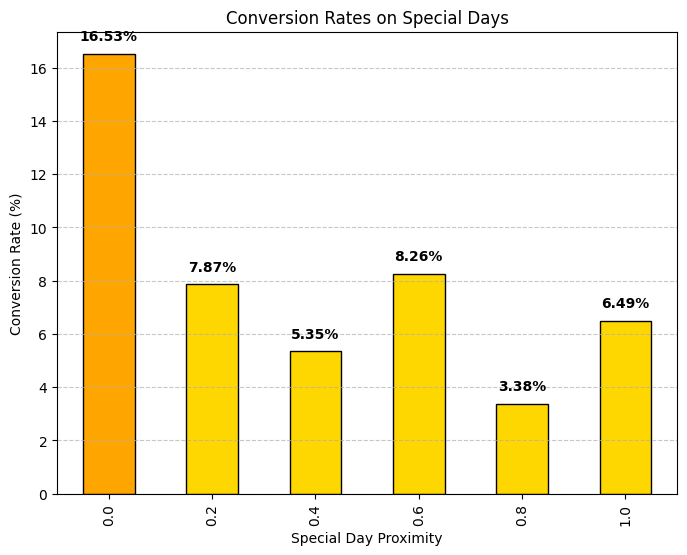

In [15]:
# Calculate conversion rates grouped by SpecialDay
special_day_conversion = shoppers_data.groupby('SpecialDay')['Revenue'].mean() * 100

# Determine the maximum conversion rate
max_conversion = special_day_conversion.max()
colors = ['gold' if rate != max_conversion else 'orange' for rate in special_day_conversion]

# Visualization
plt.figure(figsize=(8, 6))
special_day_conversion.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Conversion Rates on Special Days')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Special Day Proximity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the highest conversion rate
for i, rate in enumerate(special_day_conversion):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black', fontweight='bold')

plt.show()


*   The graph shows that conversion rates are highest when special days are close by (0.0 proximity). As the proximity to special days decreases (moving towards 1.0), conversion rates also decrease.


* This suggests that special days have a positive impact on conversions, and the farther the special day, the higher the conversion rate is likely to be.



# **How the presence of special days in a month affects the revenue.**

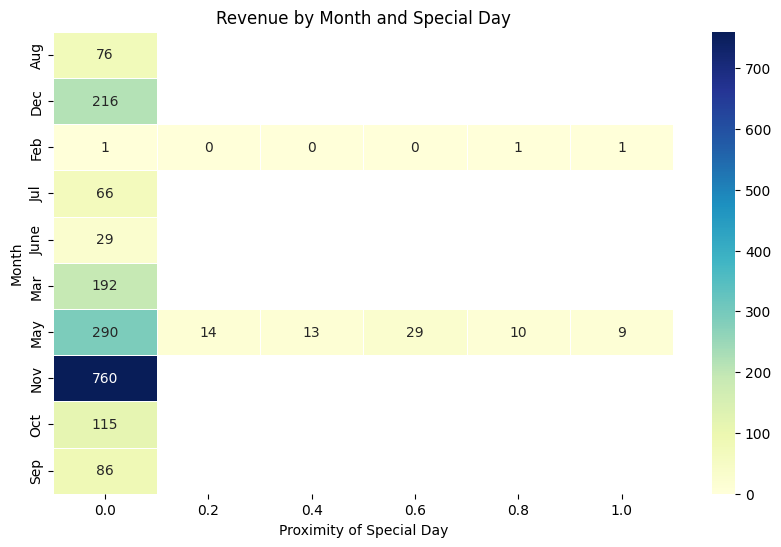

In [16]:
# Grouping the data by Month and Special Day, and summing up the rev.
special_day_revenue = shoppers_data.groupby(['Month', 'SpecialDay'])['Revenue'].sum().reset_index()

# Pivoting the data to get the right visualization
pivot_data = special_day_revenue.pivot(index='Month', columns='SpecialDay', values='Revenue')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)
plt.title('Revenue by Month and Special Day')
plt.xlabel('Proximity of Special Day')
plt.ylabel('Month')
plt.show()



*  The heatmap shows revenue by month and proximity to special days. The darker the color, the higher the revenue.

*  The months of **November** and **December** seem to generate the highest revenue, especially when special days are closer (0.0 proximity)

*  Months like February and March appear to generate the lowest revenue.

*  We suggest that special days have a significant impact on revenue, and
   planning marketing and sales strategies around these days can be beneficial.




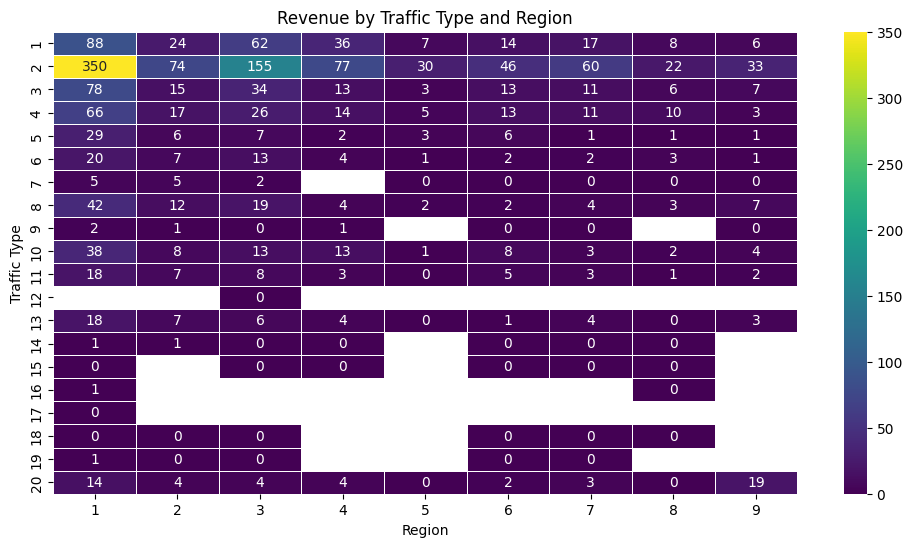

In [17]:
# Grouping data by Traffic Type and Region, and summing the Rev
traffic_region_revenue = shoppers_data.groupby(['TrafficType', 'Region'])['Revenue'].sum().reset_index()

# Pivoting the data to get Traffic Types as rows and Regions as columns
pivot_data_traffic_region = traffic_region_revenue.pivot(index='TrafficType', columns='Region', values='Revenue')

# heatmap to show the association between Traffic Type and Region vs Revenue
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data_traffic_region, annot=True, cmap='viridis', fmt='.0f', linewidths=0.5)
plt.title('Revenue by Traffic Type and Region')
plt.xlabel('Region')
plt.ylabel('Traffic Type')
plt.show()


1. Majority of the revenue is obtained by Traffic type 2 from Region 1 followed by Traffic type 2 from Region 3.
2. As per the above heat map we could observed most of the contribution is from Region 1,2,3 remaining regions have moderate contribution. There are certain regions with specific Traffic type which has zero contribution to Revenue.

# Initial Understanding of the Data
#             Distribution of target variable
#             Correlation Analysis (VIF)
#             Outliers
#             Missing Data

In [18]:
# Basic data exploration
print(shoppers_data.info())
print(shoppers_data.describe())
print(shoppers_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

-> There are no missing values found in our data set

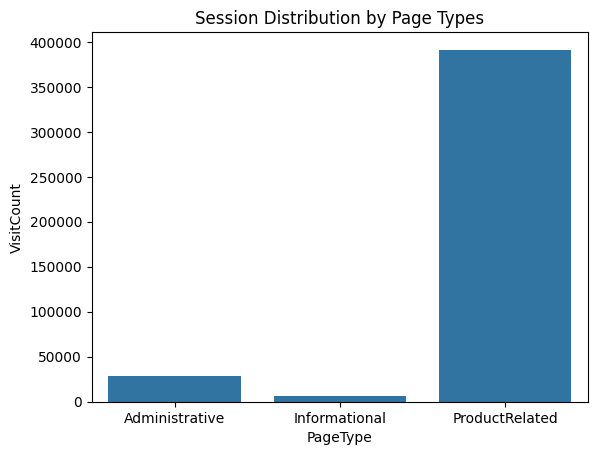

In [19]:
# Summing the visit counts for each page type and resetting the index to create a tabular format
page_types = shoppers_data[['Administrative', 'Informational', 'ProductRelated']].sum().reset_index()

# Renaming the columns for better understanding
page_types.columns = ['PageType', 'VisitCount']

# Creating a bar plot to visualize the distribution of session visits by page type
sns.barplot(x='PageType', y='VisitCount', data=page_types)
plt.title("Session Distribution by Page Types")  # Adding a title to the plot
plt.show()  # Displaying the plot


From Above graph we could see majority of Sessions are Producted Related pages which very few related to Administrative and Information type

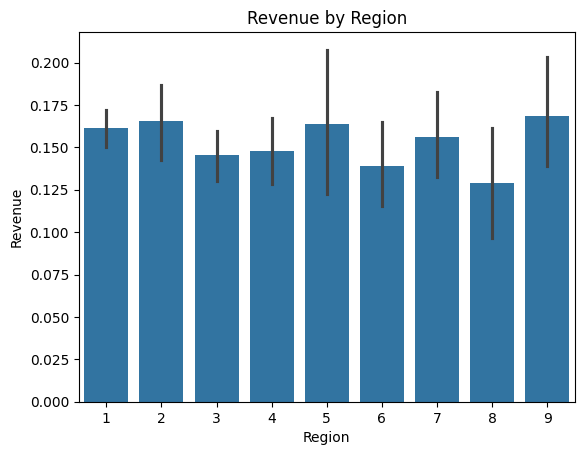

In [20]:
# Creating a bar plot to show the average revenue per region
sns.barplot(data=shoppers_data, x='Region', y='Revenue', estimator=lambda x: sum(x) / len(x)) # 'estimator' calculates the average by dividing the sum of 'Revenue' by the number of entries for each region


# Adding a title to the plot
plt.title("Revenue by Region")

# Displaying the plot
plt.show()


Above graph shows relatively consistent average revenue generation across regions, with Regions 2, 5, and 9 performing slightly better, indicating effective engagement or conversions. Regions 3 and 6 show lower revenue, suggesting opportunities for targeted improvements.

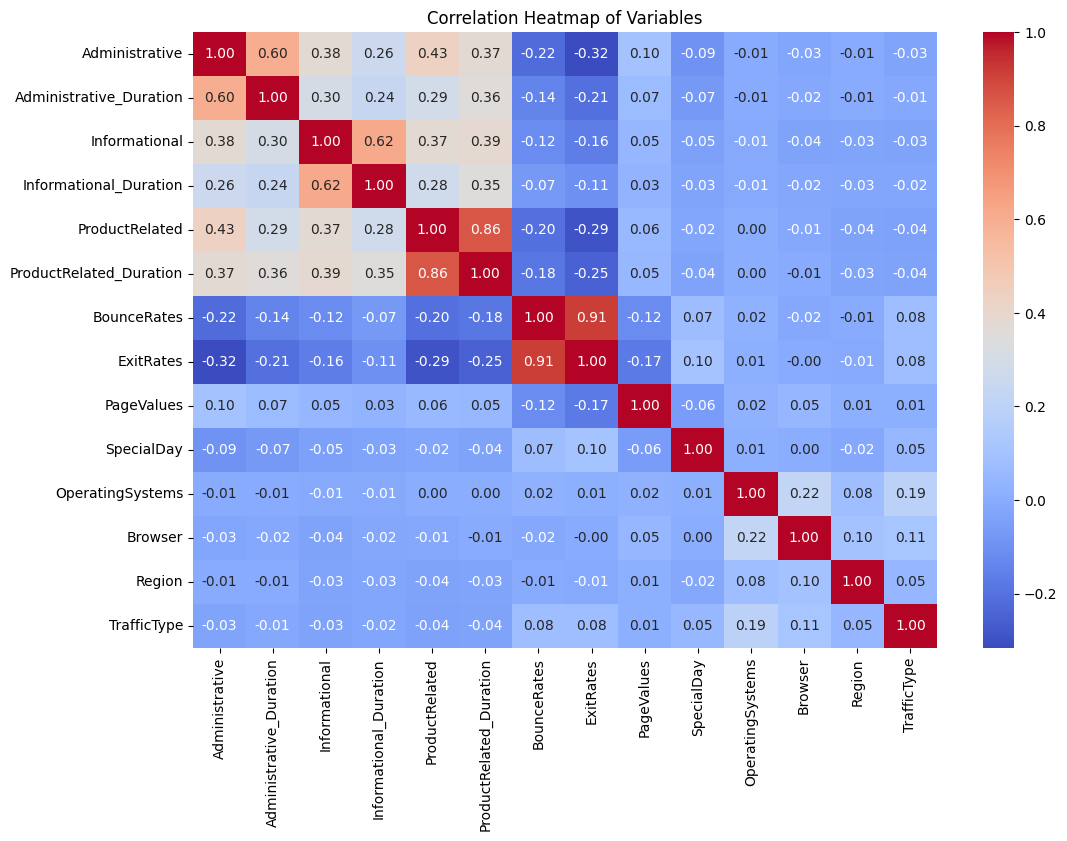

In [21]:
# Select only the numeric columns
numeric_data = shoppers_data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Variables")
plt.show()


From the correlation Heatmap we could observed features like administrative and Administrative_Duration , ProductRelated and TotalPages , BounceRates and ExitRates, Broser_10 and OperatingSystems_4 are highly correlated

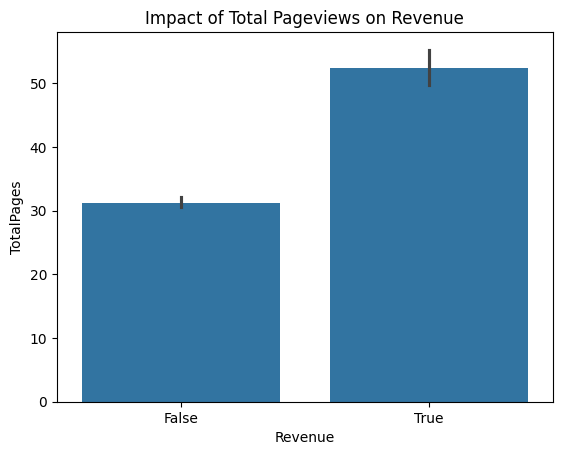

In [22]:
# Creating a new column 'TotalPages' by summing up page views across different page types
shoppers_data['TotalPages'] = shoppers_data['Administrative'] + shoppers_data['Informational'] + shoppers_data['ProductRelated']

# Creating a bar plot to show the relationship between total page views and revenue
sns.barplot(data=shoppers_data, x='Revenue', y='TotalPages')

# Adding a title to the plot
plt.title("Impact of Total Pageviews on Revenue")

# Displaying the plot
plt.show()


Above graph highlights a relationship between total pageviews and revenue generation. Sessions that result in revenue (True) have significantly higher total pageviews compared to those that do not generate revenue (False). This suggests that users who engage with more pages are more likely to make a purchase

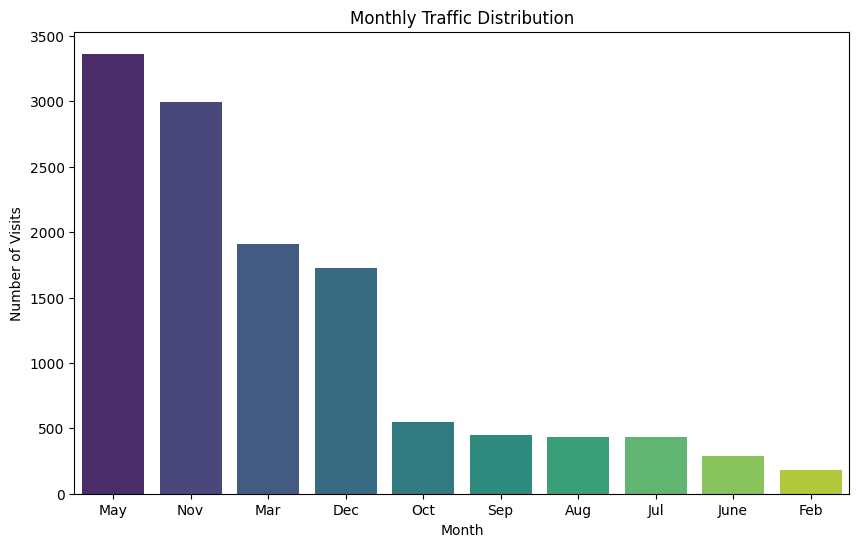

In [23]:
# monthly traffic distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=shoppers_data, order=shoppers_data['Month'].value_counts().index, palette="viridis")
plt.title("Monthly Traffic Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.show()


Above graph shows that May and November have the highest traffic, indicating peak user activity, likely due to seasonal or promotional events. Moderate traffic is observed in March and December, while February has the lowest visits, followed by June, July, and August.

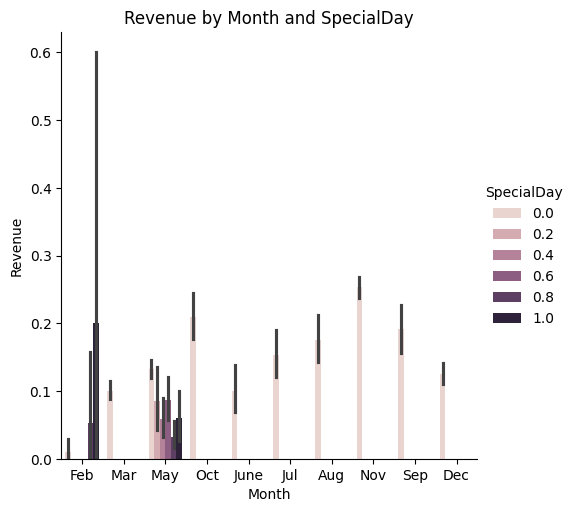

In [ ]:
# Creating a categorical plot to analyze revenue trends by month and the effect of special days
sns.catplot(data=shoppers_data, x='Month', y='Revenue', hue='SpecialDay', kind='bar')

# Adding a title to the plot
plt.title("Revenue by Month and SpecialDay")

# Displaying the plot
plt.show()


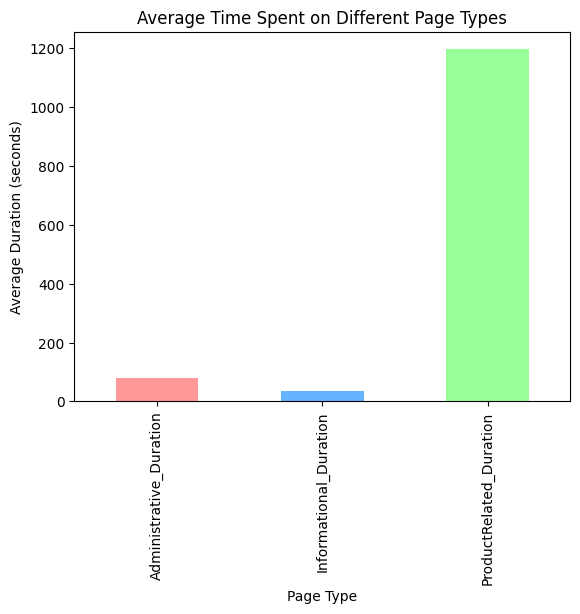

In [ ]:
# Time spent by users on different types of pages
page_durations = shoppers_data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean()
page_durations.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Average Time Spent on Different Page Types")
plt.ylabel("Average Duration (seconds)")
plt.xlabel("Page Type")
plt.show()

From the above graph we could see that most of the users are spending time more on the Product related pages rather than Administrative and information

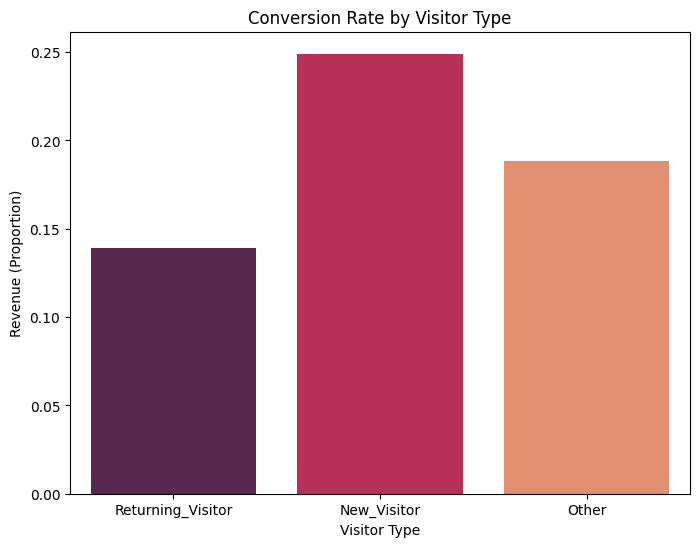

In [ ]:
# Revenue Analysis by Visitor Type
plt.figure(figsize=(8, 6))
sns.barplot(x="VisitorType", y="Revenue", data=shoppers_data, estimator=np.mean, ci=None, palette="rocket")
plt.title("Conversion Rate by Visitor Type")
plt.ylabel("Revenue (Proportion)")
plt.xlabel("Visitor Type")
plt.show()

Above graph shows that New Visitors have the highest conversion rate, followed by Other Visitors, while Returning Visitors have the lowest conversion rate. This suggests that first-time users are more likely to make purchases, highlighting the importance of targeting and engaging new visitors effectively while improving strategies to re-engage returning visitors.

**Analysing data distribution for numerical features.**

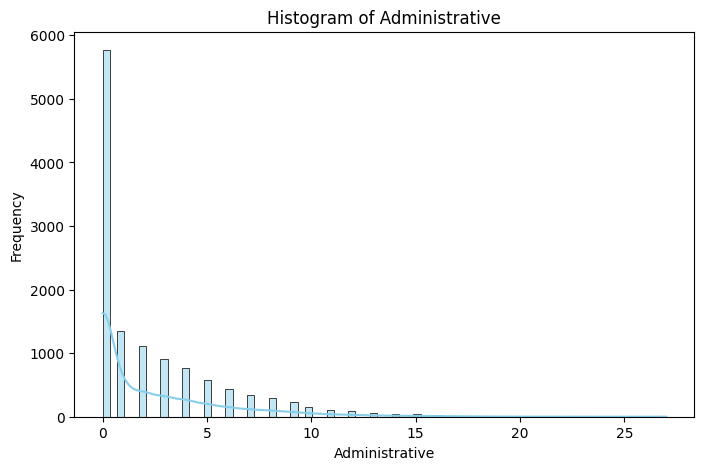

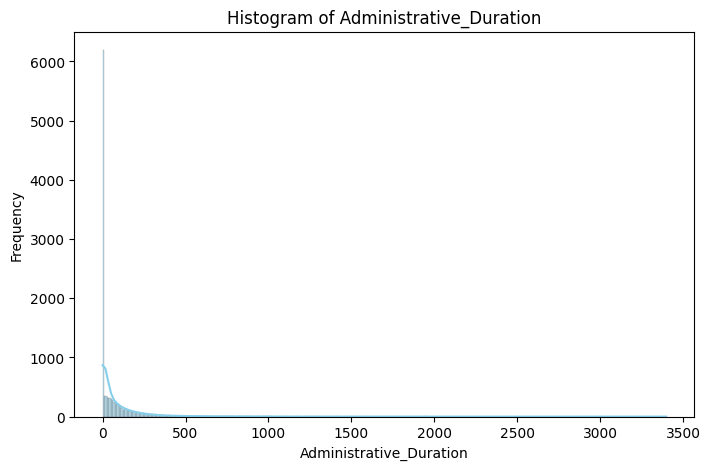

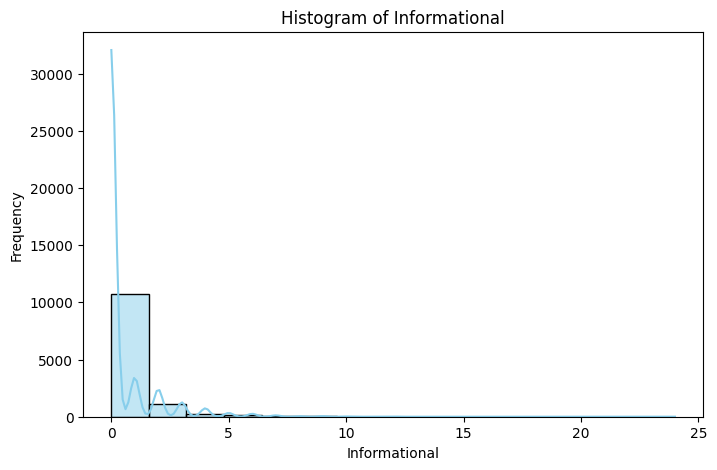

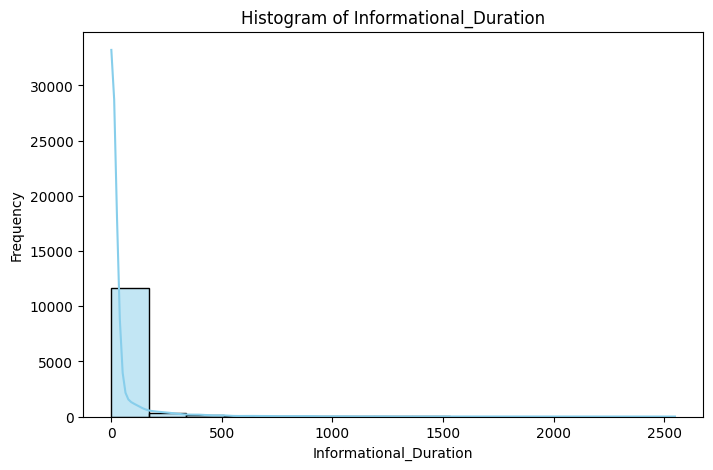

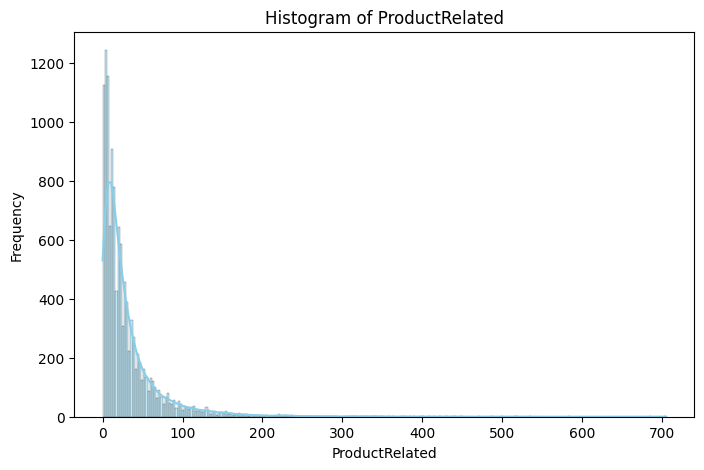

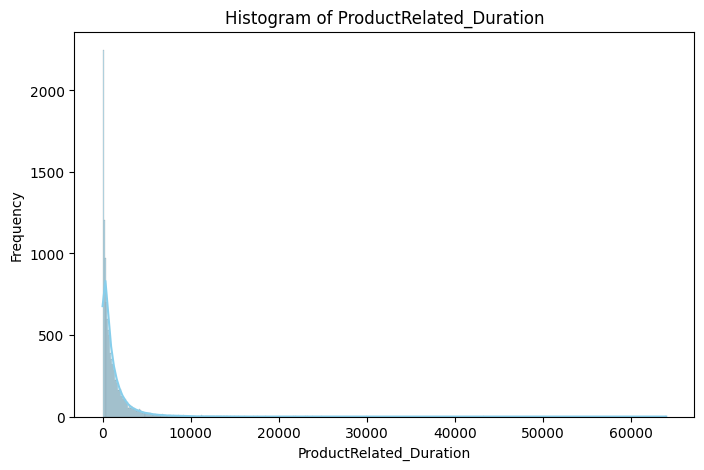

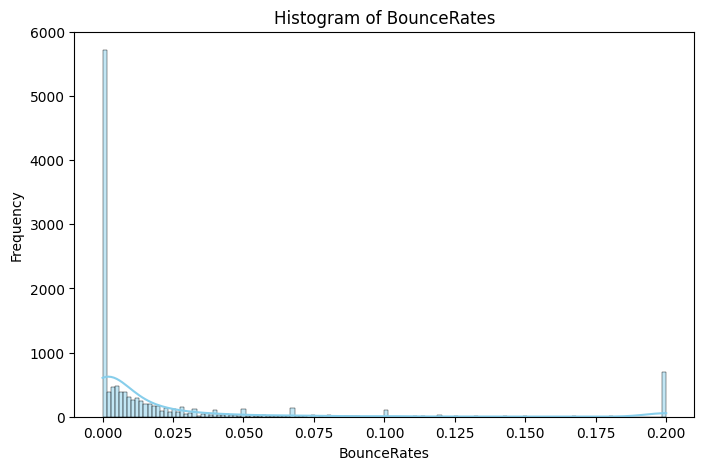

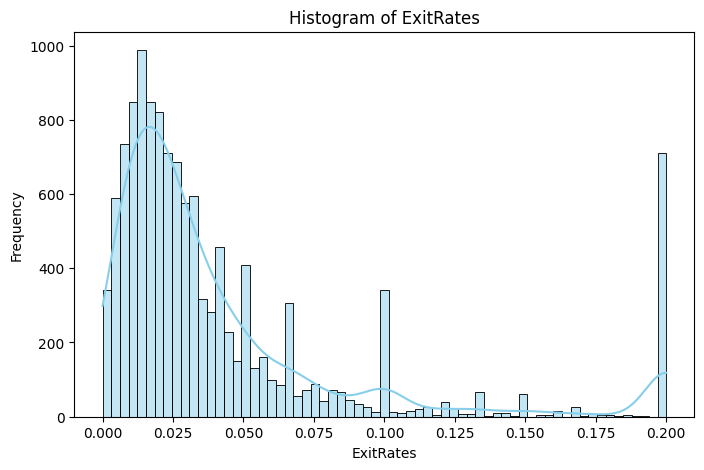

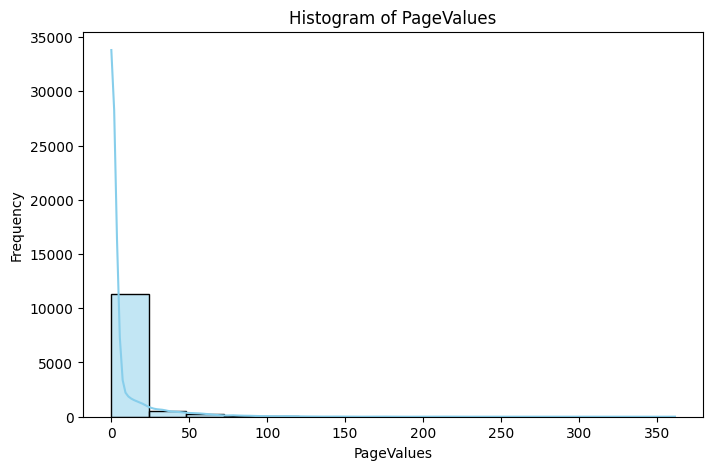

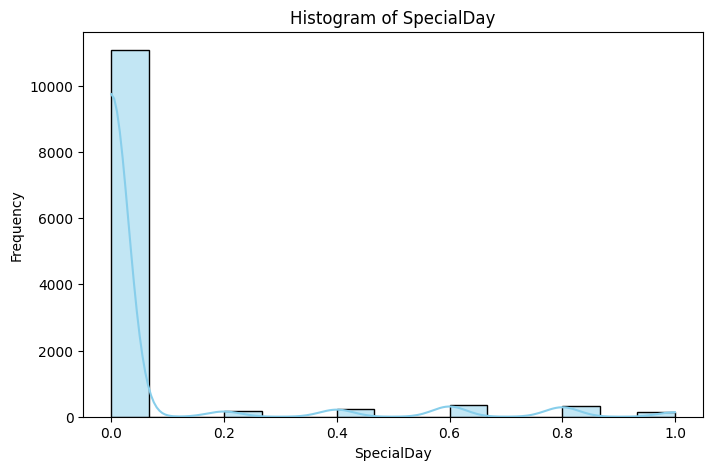

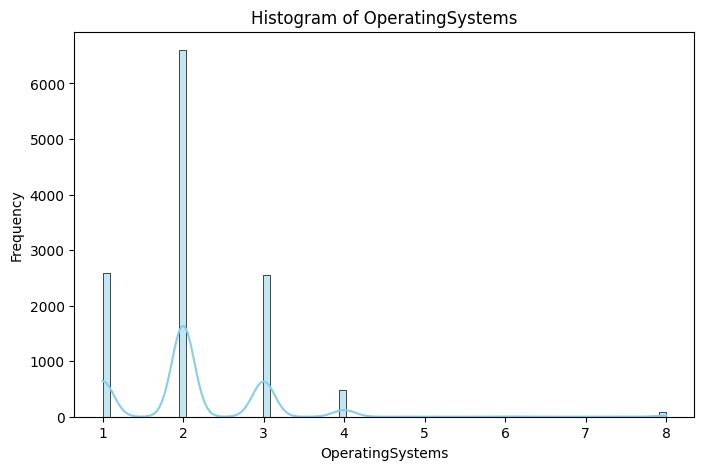

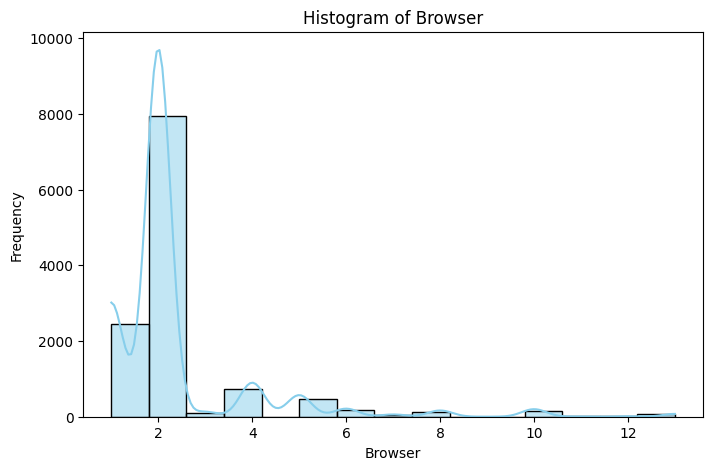

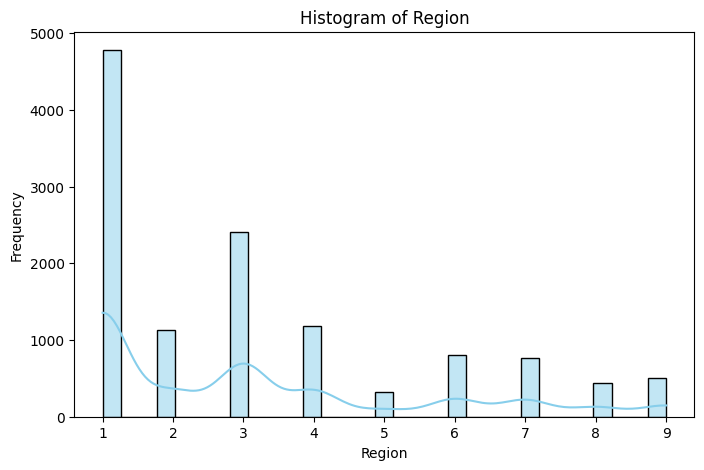

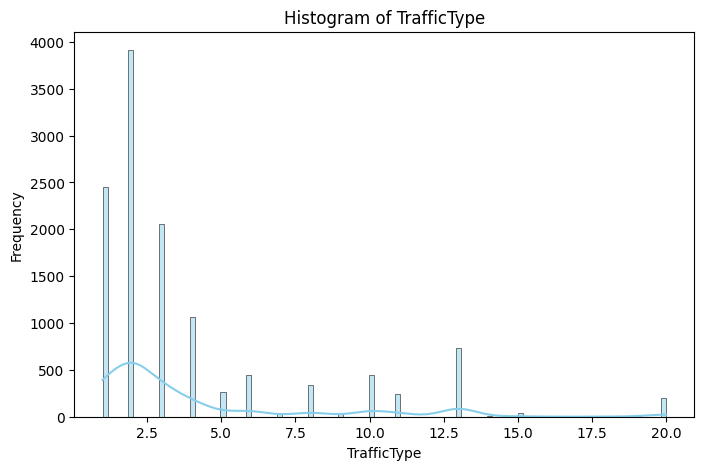

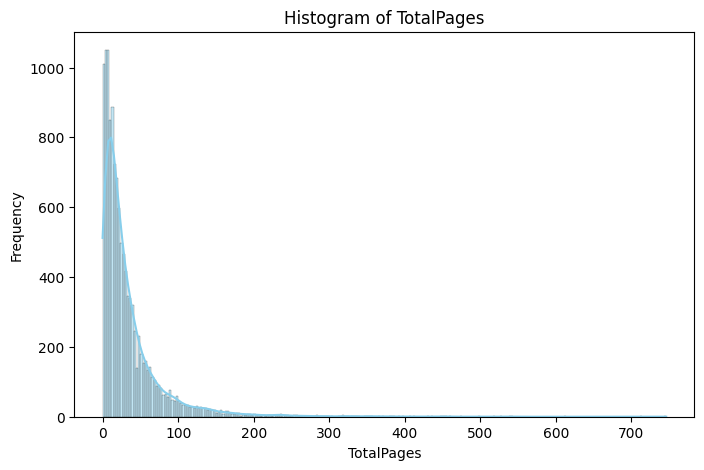

In [ ]:
# Select numerical columns
numerical_vars = shoppers_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(shoppers_data[var], kde=True, color="skyblue")
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Fromt the above histogram plots we could observed most of the features are right skewed in nature

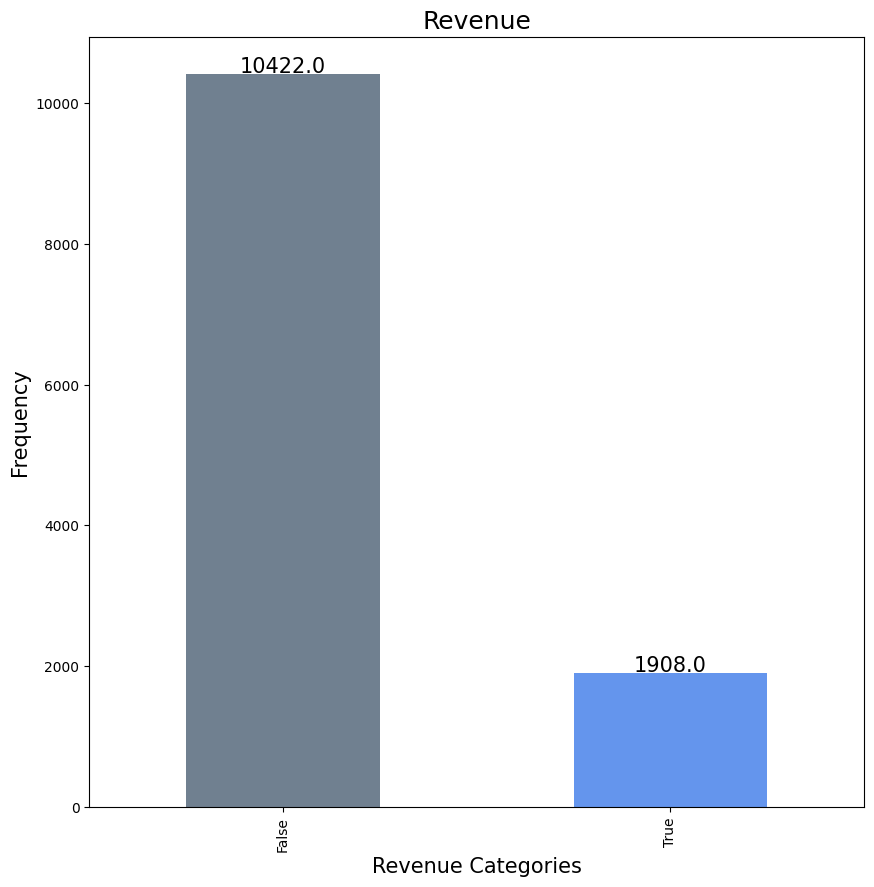

In [ ]:
# Plot a bar chart for 'Revenue'
plt.figure(figsize=(10, 10))
counts = shoppers_data['Revenue'].value_counts()

# Plot the bar chart
ax = counts.plot(kind='bar', color=['slategray', 'cornflowerblue'])

# Add title and labels
plt.title('Revenue', fontsize=18)
plt.xlabel('Revenue Categories', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Add annotations (value labels) on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=15, color='black',
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()


Above graphs shows us the imbalance nature of the target variable "Revenue" with majority of belongs to category "False" indicating revenue not getting generated.

Performing SMOTENC Operation to handle the imbalance nature of the target variable "Revenue"

In [ ]:
# Separate features and target variable
X = shoppers_data.drop('Revenue', axis=1)
y = shoppers_data['Revenue'] # Replace with your target column name

categorical_cols = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'TrafficType']
# Label encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Apply SMOTE-NC for handling imbalanced dataset
smote_nc = SMOTENC(categorical_features=[X.columns.get_loc(c) for c in categorical_cols], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)



In [ ]:
import pandas as pd

# Create a new DataFrame from the resampled data
shoppers_data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
shoppers_data_balanced['Revenue'] = y_resampled

print(shoppers_data_balanced.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 0   
1         0.00       0.10         0.0         0.0      2

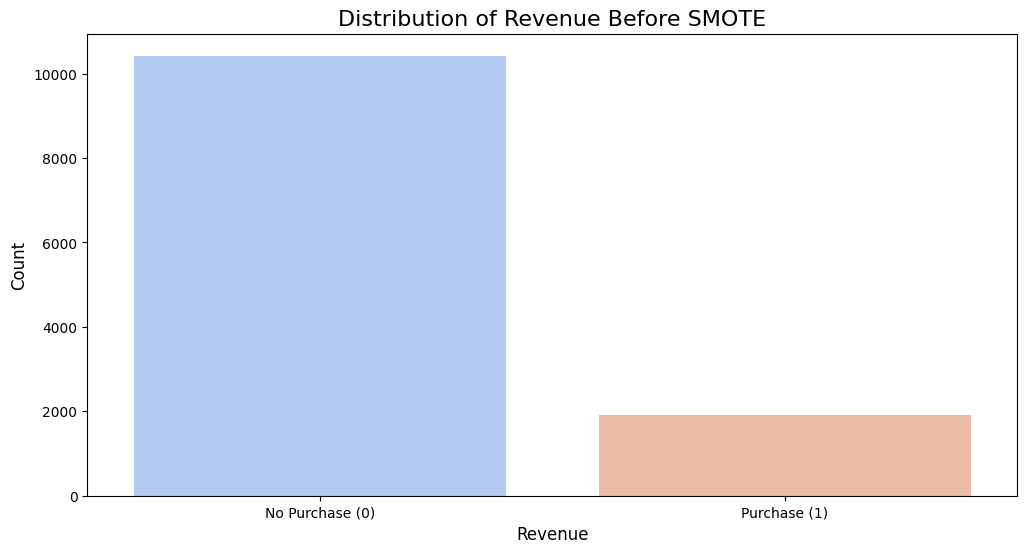

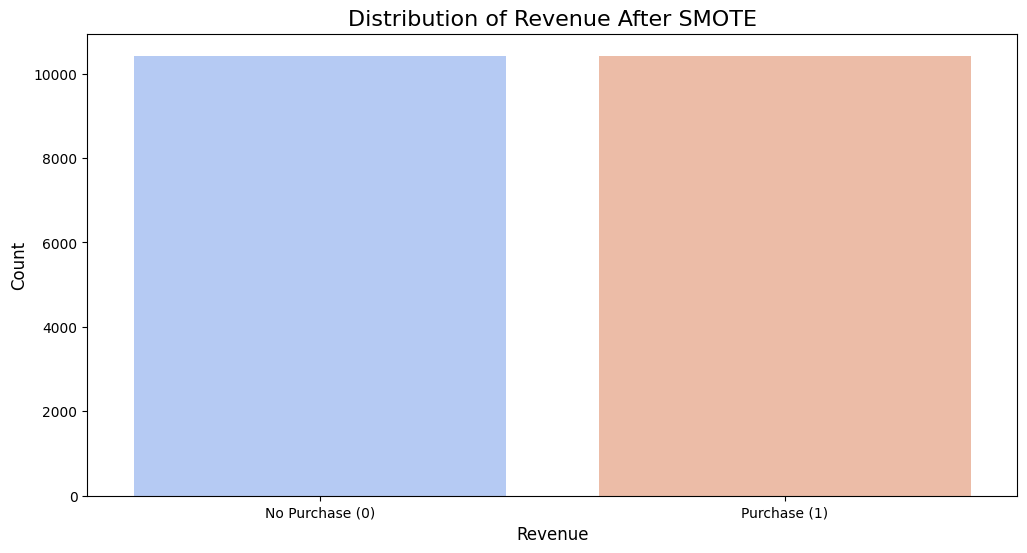

In [ ]:
# Before SMOTE distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Revenue Before SMOTE", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No Purchase (0)", "Purchase (1)"])
plt.show()

# After SMOTE distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=y_resampled, palette="coolwarm")
plt.title("Distribution of Revenue After SMOTE", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No Purchase (0)", "Purchase (1)"])
plt.show()

Performing One hot encoding for the categorical variables to analyse the correlation.

In [ ]:
categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'TrafficType']

# 1. One-Hot Encoding for nominal categorical features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids the dummy variable trap
one_hot_encoded = one_hot_encoder.fit_transform(shoppers_data_balanced[['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'TrafficType']])

# Convert to DataFrame with appropriate column names
one_hot_encoded_shoppers_data = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'TrafficType']))

In [ ]:
# Merging the One-Hot Encoded Data back to the original data
data= pd.concat([shoppers_data_balanced, one_hot_encoded_shoppers_data], axis=1)

# Dropping the original categorical columns after encoding
data= data.drop(['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'TrafficType'], axis=1)

# Display the updated dataframe
print(data.head())

shoppers_data = data

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_10  \
0         0.20       0.20         0.0         0.0  ...             0.0   
1         0.00       0.10         0.0         0.0  ...          

In [ ]:
y_resampled.shape

(20844,)

Evaluating the null values post one hot encoding

In [ ]:
print(shoppers_data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
                          ..
TrafficType_15             0
TrafficType_16             0
TrafficType_17             0
TrafficType_18             0
TrafficType_19             0
Length: 63, dtype: int64


Detectiong of Outliers and Handling them using log transformation

In [ ]:
def count_outliers_zscore(shoppers_data, column, threshold=3):

    z_scores = zscore(shoppers_data[column]) # Calculate the Z-scores

    outliers_count = (abs(z_scores) > threshold).sum() # Count outliers
    return outliers_count

numerical_vars = shoppers_data.select_dtypes(include=['float64', 'int64']).columns

# Counting outliers for each numerical variable using Z-score
outliers_count_dict_zscore = {}
for var in numerical_vars:
    outliers_count = count_outliers_zscore(shoppers_data, var)
    if outliers_count > 0:
        outliers_count_dict_zscore[var] = outliers_count

# Display the count of outliers
for var, count in outliers_count_dict_zscore.items():
    print(f'Outliers count in {var} (Z-score method): {count}')


Outliers count in Administrative (Z-score method): 310
Outliers count in Administrative_Duration (Z-score method): 418
Outliers count in Informational (Z-score method): 441
Outliers count in Informational_Duration (Z-score method): 477
Outliers count in ProductRelated (Z-score method): 431
Outliers count in ProductRelated_Duration (Z-score method): 440
Outliers count in BounceRates (Z-score method): 777
Outliers count in ExitRates (Z-score method): 802
Outliers count in PageValues (Z-score method): 375
Outliers count in SpecialDay (Z-score method): 933
Outliers count in TotalPages (Z-score method): 439
Outliers count in Month_2 (Z-score method): 186
Outliers count in Month_3 (Z-score method): 570
Outliers count in Month_4 (Z-score method): 305
Outliers count in Month_8 (Z-score method): 900
Outliers count in Month_9 (Z-score method): 663
Outliers count in VisitorType_1 (Z-score method): 85
Outliers count in OperatingSystems_3 (Z-score method): 539
Outliers count in OperatingSystems_4 (

Evaluating skewness post log transformation of the values

In [ ]:
# Skewness before and after transformation
print("Skewness before transformation:")
print(shoppers_data.skew())
# Apply log transformation for skewed features exclduing target feature
for feature in shoppers_data:
    if feature != 'Revenue':
        shoppers_data[feature] = np.log1p(shoppers_data[feature])

print("\nSkewness after transformation:")
print(shoppers_data.skew())

Skewness before transformation:
Administrative               1.673874
Administrative_Duration      4.780965
Informational                3.620516
Informational_Duration       6.185935
ProductRelated               3.633289
                              ...    
TrafficType_15              72.171669
TrafficType_16             144.374513
TrafficType_17              45.625652
TrafficType_18              32.238960
TrafficType_19               8.985241
Length: 63, dtype: float64

Skewness after transformation:
Administrative               0.360797
Administrative_Duration     -0.051514
Informational                1.887550
Informational_Duration       1.541838
ProductRelated              -0.155795
                              ...    
TrafficType_15              72.171669
TrafficType_16             144.374513
TrafficType_17              45.625652
TrafficType_18              32.238960
TrafficType_19               8.985241
Length: 63, dtype: float64


In [ ]:
def count_outliers_zscore(shoppers_data, column, threshold=3):

    z_scores = zscore(shoppers_data[column]) # Calculate the Z-scores

    outliers_count = (abs(z_scores) > threshold).sum() # Count outliers
    return outliers_count

numerical_vars = shoppers_data.select_dtypes(include=['float64', 'int64']).columns

# Counting outliers for each numerical variable using Z-score
outliers_count_dict_zscore = {}
for var in numerical_vars:
    outliers_count = count_outliers_zscore(shoppers_data, var)
    if outliers_count > 0:
        outliers_count_dict_zscore[var] = outliers_count

# Display the count of outliers
for var, count in outliers_count_dict_zscore.items():
    print(f'Outliers count in {var} (Z-score method): {count}')



Outliers count in Informational (Z-score method): 441
Outliers count in Informational_Duration (Z-score method): 77
Outliers count in ProductRelated (Z-score method): 2
Outliers count in ProductRelated_Duration (Z-score method): 800
Outliers count in BounceRates (Z-score method): 778
Outliers count in ExitRates (Z-score method): 802
Outliers count in SpecialDay (Z-score method): 957
Outliers count in TotalPages (Z-score method): 2
Outliers count in Month_2 (Z-score method): 186
Outliers count in Month_3 (Z-score method): 570
Outliers count in Month_4 (Z-score method): 305
Outliers count in Month_8 (Z-score method): 900
Outliers count in Month_9 (Z-score method): 663
Outliers count in VisitorType_1 (Z-score method): 85
Outliers count in OperatingSystems_3 (Z-score method): 539
Outliers count in OperatingSystems_4 (Z-score method): 6
Outliers count in OperatingSystems_5 (Z-score method): 19
Outliers count in OperatingSystems_6 (Z-score method): 7
Outliers count in OperatingSystems_7 (Z-s

In [ ]:
shoppers_data # transformed data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19
0,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.182322,0.182322,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,1.098612,4.174387,0.000000,0.095310,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.182322,0.182322,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,1.098612,1.299283,0.048790,0.131028,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,2.397895,6.443336,0.019803,0.048790,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,1.791759,4.994742,0.0,0.000000,2.995732,6.008611,0.003453,0.010563,3.950276,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20840,1.945910,5.910729,0.0,0.000000,3.496508,7.144840,0.010374,0.014770,2.493909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20841,2.484907,6.194269,0.0,1.760766,3.178054,7.336463,0.009162,0.020703,3.158958,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20842,1.609438,5.230184,0.0,0.000000,3.135494,6.399896,0.000000,0.005179,3.821243,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


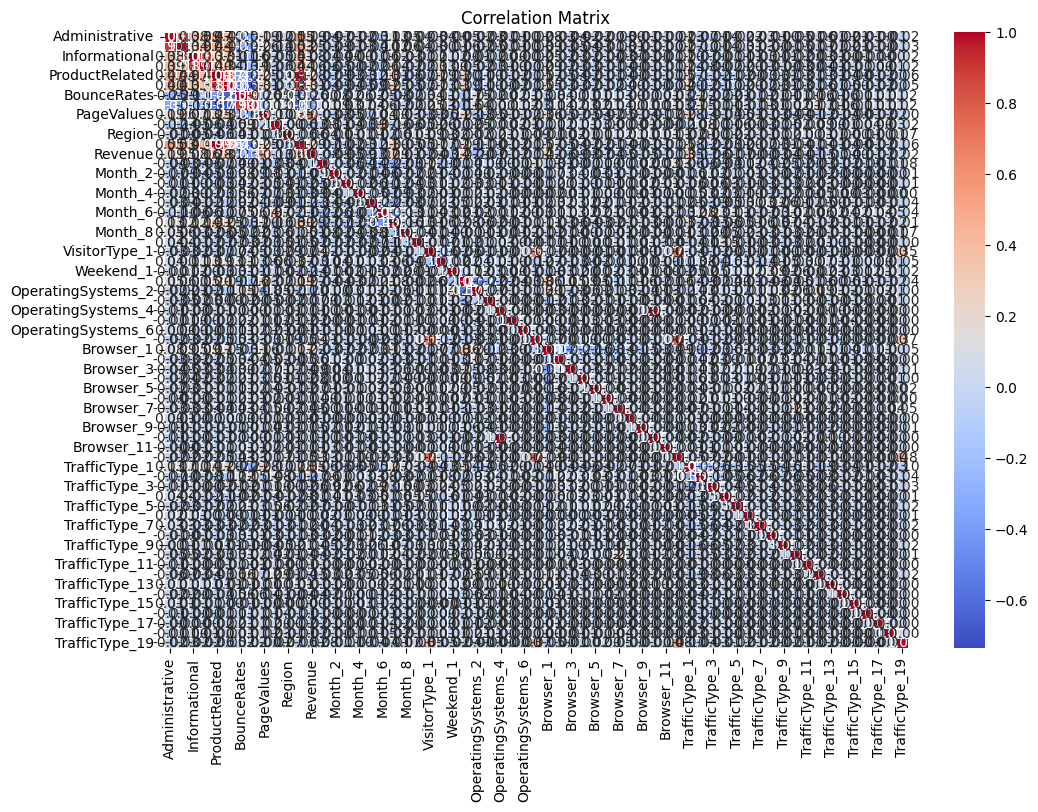

In [ ]:
# Calculate the correlation matrix
correlation_matrix = shoppers_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Calculating the correlation matrix
correlation_matrix =shoppers_data.corr()

# Converting the correlation matrix to another format for easy display
corr_values = correlation_matrix.unstack().reset_index()
corr_values.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filtering out pairs of the same feature
corr_values = corr_values[corr_values['Feature_1'] != corr_values['Feature_2']]


corr_threshold = 0.9
corr_values = corr_values[corr_values['Correlation'].abs() > corr_threshold]

# Displaying the correlation values
print(corr_values)

                    Feature_1                Feature_2  Correlation
1              Administrative  Administrative_Duration     0.909707
63    Administrative_Duration           Administrative     0.909707
263            ProductRelated               TotalPages     0.989507
385               BounceRates                ExitRates     0.900629
447                 ExitRates              BounceRates     0.900629
697                TotalPages           ProductRelated     0.989507
1805       OperatingSystems_4               Browser_10     1.000000
2611               Browser_10       OperatingSystems_4     1.000000


In [ ]:
#Separating the features (X) and target (y)
X = shoppers_data.drop(columns=["Revenue"])  # Drop the target column

Performing Variance inflation factor to avoid multi collinearity issue and features which are having VIF value > 5 are dropped

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
# Filter the high VIF features (VIF > 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]

# List the features and their VIF values
high_vif_features_list = high_vif_features[['Feature', 'VIF']]

# Display the features with high VIF
print("Features with VIF greater than 5:")
print(high_vif_features_list)

# List of features to drop (excluding 'const')
features_to_drop = high_vif_features['Feature'].tolist()
features_to_drop = [feature for feature in features_to_drop if feature != 'const']

# Final list of features to drop
print("\nFeatures to drop (excluding 'const'):")
print(features_to_drop)


Features with VIF greater than 5:
                    Feature        VIF
0            Administrative  13.501022
1   Administrative_Duration  15.321475
2             Informational   6.361824
3    Informational_Duration   6.765549
4            ProductRelated  53.223735
5   ProductRelated_Duration  78.214142
6               BounceRates   7.733973
7                 ExitRates  12.537337
10                   Region   6.475220
16                  Month_6   7.835983
17                  Month_7  10.909931
21            VisitorType_2   9.100903
23       OperatingSystems_1  11.706146
26       OperatingSystems_4        inf
30                Browser_1  13.694999
39               Browser_10        inf

Features to drop (excluding 'const'):
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Region', 'Month_6', 'Month_7', 'VisitorType_2', 'OperatingSystems_1', 'OperatingSystems_4', 'Browser_

In [ ]:
# Defining a function to calculate VIF for the given features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Iteratively drop features with VIF > threshold
def iterative_vif_reduction(X, threshold=5.0):
    while True:
        # Calculate VIF for the features
        vif_data = calculate_vif(X)
        # Check if all VIF values are below the threshold
        max_vif = vif_data["VIF"].max()
        if max_vif <= threshold:
            break  # Stop the iteration if all VIF values are below the threshold

        # Find the feature with the highest VIF
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]
        print(f"Dropping feature: {feature_to_drop} (VIF = {max_vif:.2f})")

        # Drop the feature with the highest VIF
        X = X.drop(columns=[feature_to_drop])

    return X, vif_data


threshold = 5.0
X_reduced, final_vif_data = iterative_vif_reduction(X, threshold)

# Display the final set of features and their VIF values
print("\nFinal set of features:")
print(final_vif_data)


Dropping feature: Browser_10 (VIF = inf)
Dropping feature: TotalPages (VIF = 1124.20)
Dropping feature: ProductRelated_Duration (VIF = 78.06)
Dropping feature: ProductRelated (VIF = 17.48)
Dropping feature: Browser_1 (VIF = 16.20)
Dropping feature: Administrative_Duration (VIF = 15.04)
Dropping feature: ExitRates (VIF = 11.04)
Dropping feature: VisitorType_2 (VIF = 7.64)
Dropping feature: Informational_Duration (VIF = 6.62)
Dropping feature: Region (VIF = 6.18)
Dropping feature: Month_7 (VIF = 5.05)

Final set of features:
               Feature       VIF
0       Administrative  2.526432
1        Informational  1.479290
2          BounceRates  1.292400
3           PageValues  2.221558
4           SpecialDay  1.313916
5              Month_1  1.275431
6              Month_2  1.065197
7              Month_3  1.073117
8              Month_4  1.048648
9              Month_5  1.282062
10             Month_6  1.996416
11             Month_8  1.122988
12             Month_9  1.106174
13       

In [ ]:
final_vif_data

,Feature,VIF
0,Administrative,2.526432
1,Informational,1.479290
2,BounceRates,1.292400
3,PageValues,2.221558
4,SpecialDay,1.313916
5,Month_1,1.275431
6,Month_2,1.065197
7,Month_3,1.073117
8,Month_4,1.048648
9,Month_5,1.282062


Above are the final set of features which are used for model building.

In [ ]:
final_features = ['Administrative', 'Informational', 'BounceRates', 'PageValues', 'SpecialDay', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_8', 'Month_9', 'VisitorType_1', 'Weekend_1', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_11', 'Browser_12', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19'
]
X=X_reduced[final_features]
y=y_resampled



In [ ]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20844 entries, 0 to 20843
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Administrative      20844 non-null  float64
 1   Informational       20844 non-null  float64
 2   BounceRates         20844 non-null  float64
 3   PageValues          20844 non-null  float64
 4   SpecialDay          20844 non-null  float64
 5   Month_1             20844 non-null  float64
 6   Month_2             20844 non-null  float64
 7   Month_3             20844 non-null  float64
 8   Month_4             20844 non-null  float64
 9   Month_5             20844 non-null  float64
 10  Month_6             20844 non-null  float64
 11  Month_8             20844 non-null  float64
 12  Month_9             20844 non-null  float64
 13  VisitorType_1       20844 non-null  float64
 14  Weekend_1           20844 non-null  float64
 15  OperatingSystems_1  20844 non-null  float64
 16  Oper

In [ ]:
X = X_reduced  # Features
y = shoppers_data['Revenue']  # Target variable

In [ ]:
print(X.shape)  # Check the number of rows and columns
print(y.shape)

(20844, 51)
(20844,)


Splitting the data set to train(70%) and test(30%).

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1025)

Training logisitc regression model using Train data set

In [ ]:
# Training logistic regression model
logistic_model = LogisticRegression(random_state=1025, max_iter=1000)
result = logistic_model.fit(X_train, y_train)

Predicting target values for test data set using the model built

In [ ]:
# predictions
y_pred = logistic_model.predict(X_test)

In [ ]:
# Model Summary

# Intercept of the model
intercept = logistic_model.intercept_

# Extract the feature names from the DataFrame
feature_names = X_train.columns

# Extract the coefficients from the trained model (it is a 2D array, we take the first row)
coefficients = logistic_model.coef_[0]

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value for better clarity
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the model summary
print(f"Logistic Regression Model Summary:")
print(f"Intercept: {intercept[0]}")
print(coefficients_df[['Feature', 'Coefficient']])


Logistic Regression Model Summary:
Intercept: -1.5073851904966582
               Feature  Coefficient
6              Month_2    -3.376109
2          BounceRates    -3.177195
25           Browser_5    -2.747606
8              Month_4    -2.738669
9              Month_5    -2.391299
5              Month_1    -2.316541
10             Month_6    -2.011447
23           Browser_3    -1.827225
29           Browser_9    -1.816612
26           Browser_6    -1.814571
24           Browser_4    -1.786962
22           Browser_2    -1.778195
35       TrafficType_4     1.728085
11             Month_8    -1.556447
43      TrafficType_12    -1.538941
32       TrafficType_1     1.487455
3           PageValues     1.382009
7              Month_3    -1.325146
15  OperatingSystems_1     1.192501
19  OperatingSystems_5    -1.172361
12             Month_9    -0.896372
4           SpecialDay    -0.870741
14           Weekend_1    -0.781647
49      TrafficType_18     0.717233
38       TrafficType_7     0.69549

Generating Confusion Matrix for Logistic Regression Model

In [ ]:
# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[2826  317]
 [ 385 2726]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.90      0.89      3143
        True       0.90      0.88      0.89      3111

    accuracy                           0.89      6254
   macro avg       0.89      0.89      0.89      6254
weighted avg       0.89      0.89      0.89      6254


Accuracy Score: 0.8877518388231532


1. The model correctly classified 2826 non-revenue sessions (True Negatives) and 2726 revenue sessions (True Positives).
2. Models shows a balanced precision between revenue (0.90) and non-revenue sessions (0.88) indicating a low rate of false positives.
3. Similarly for recall between revenue (0.88) and non-revenue sessions (0.90) reflecting the model's ability to correctly identify true cases.
4. 	With a Good F1-score at 0.89 for both classes model demonstrating a strong balance between precision and recall.
5. Overall model accuracy is 0.88.


ROC Curve for train and test predictions

In [ ]:
def predictor(model_class):
    # Initialize the model (create an instance of the model)
    model_name = model_class()

    print("For the {}".format(model_class))

    # Fit the model
    model_name.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    # Calculate and print TRAIN accuracy and ROC score
    print("The TRAIN accuracy is", accuracy_score(y_train, y_pred_train))
    print("The ROC score for TRAIN data is", roc_auc_score(y_train, y_pred_train))

    # ROC Curve for TRAIN data
    fpr, tpr, thresholds = roc_curve(y_train, model_name.predict_proba(X_train)[:, 1])
    plt.plot(fpr, tpr, label="Train ROC")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic (Train)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

    print("--" * 50)

    # Calculate and print TEST accuracy and ROC score
    print("The TEST accuracy is", accuracy_score(y_test, y_pred_test))
    print("The ROC score for TEST data is", roc_auc_score(y_test, y_pred_test))

    # ROC Curve for TEST data
    fpr, tpr, thresholds = roc_curve(y_test, model_name.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label="Test ROC")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic (Test)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

For the <class 'sklearn.linear_model._logistic.LogisticRegression'>
The TRAIN accuracy is 0.8814256339958876
The ROC score for TRAIN data is 0.8814437043331209


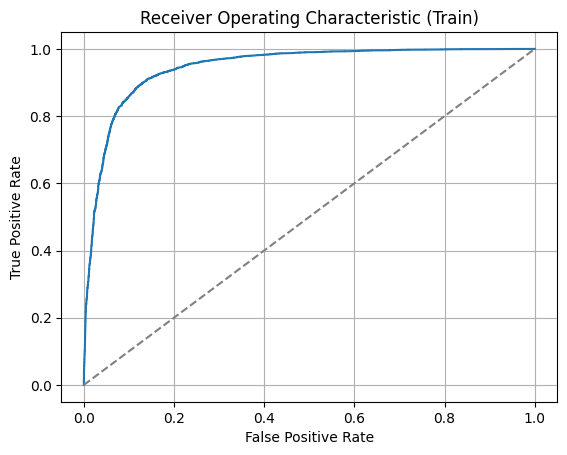

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8888711224816118
The ROC score for TEST data is 0.8888003045243071


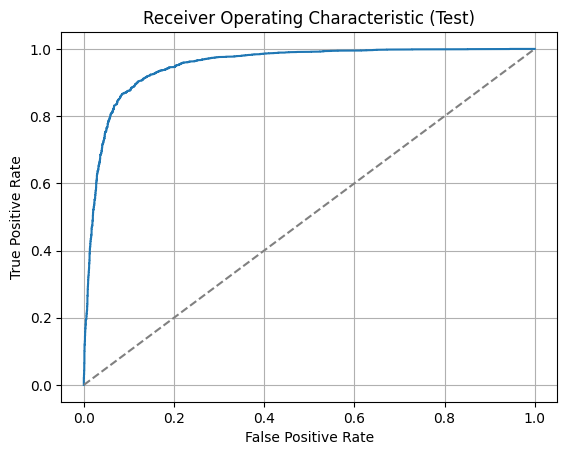

In [ ]:
predictor(LogisticRegression)



1. From the above ROC curves for the training and testing datasets it indicates consistent model performance.
2. For the training data, the model achieves an accuracy of 88.14% with an AUC score of 0.88, while for the testing data, it achieves a slightly higher accuracy of 89.87%, also with an AUC score of 0.88.
3. The similarity in AUC scores between the training and testing datasets demonstrates that the model generalizes well and is not overfitting.
4. This consistency suggests that the logistic regression model is reliable for distinguishing between revenue and non-revenue sessions across both seen and unseen data.


**Feature Importance from Logistic Regression**

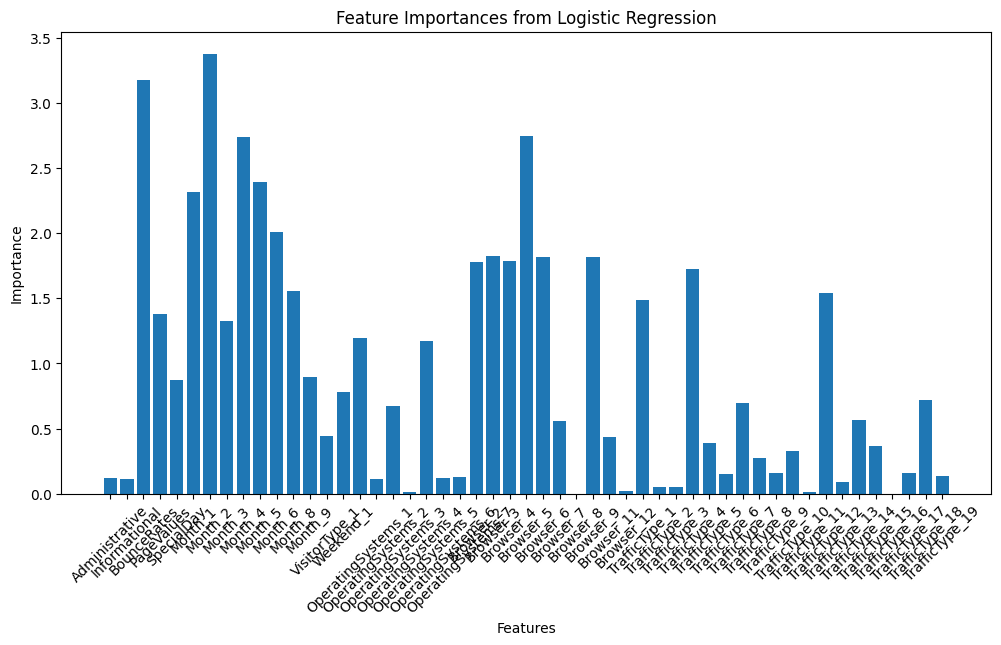

Feature 1 is associated with column: Administrative
Feature 2 is associated with column: Informational
Feature 3 is associated with column: BounceRates
Feature 4 is associated with column: PageValues
Feature 5 is associated with column: SpecialDay
Feature 6 is associated with column: Month_1
Feature 7 is associated with column: Month_2
Feature 8 is associated with column: Month_3
Feature 9 is associated with column: Month_4
Feature 10 is associated with column: Month_5
Feature 11 is associated with column: Month_6
Feature 12 is associated with column: Month_8
Feature 13 is associated with column: Month_9
Feature 14 is associated with column: VisitorType_1
Feature 15 is associated with column: Weekend_1
Feature 16 is associated with column: OperatingSystems_1
Feature 17 is associated with column: OperatingSystems_2
Feature 18 is associated with column: OperatingSystems_3
Feature 19 is associated with column: OperatingSystems_4
Feature 20 is associated with column: OperatingSystems_5
Fea

In [ ]:
if isinstance(X_train, np.ndarray):
    feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]
else:
    feature_names = X_train.columns.tolist()  # Use the column names from X_train

# Fit the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Get the coefficients from the logistic regression model
coefficients = np.abs(logistic_model.coef_[0])

feature_map = {f"Feature {i+1}": feature_names[i] for i in range(len(feature_names))}

# Plot the absolute value of the coefficients as feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)  # Plot with actual feature names
plt.xlabel('Features')  # X-axis label
plt.ylabel('Importance')  # Y-axis label
plt.title('Feature Importances from Logistic Regression')  # Title
plt.xticks(rotation=45)  # Rotate feature names for readability
plt.show()

# Print the mapping of "Feature 1", "Feature 2", ... to column names
for feature, column_name in feature_map.items():
    print(f"{feature} is associated with column: {column_name}")


Above are the top 20 features which has highest influence rate on the Revenue